# **House Rocket Challenge**

The challenge is a simulation of a digital platform whose business model is the purchase and sale of real estate.
I'm taking the role of a data scientist hired to help find the best opportunities in the real estate market.

My main strategy is to buy good houses with great locations and low price and then resell them later with higher prices. So my job as a data scientist is answer the following questions:

Which houses should de CEO of House Rocket buy and a what purchase price?

Once the house is owned by the company, what's the best moment to sell it and what would be the sale price?

The House Rocket should do some renovation to increase the sale price? What would be the suggestions for changes? What is the increase in the price given for each renovation option?

What's the ideal house's profile based on average price and frequency?

## **Importing libraries and dataframe**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data.csv


In [3]:
df = pd.read_csv("kc_house_data.csv")

## **Sales throughout the year**

### **Date**

In [4]:
df.date.describe()

count               21613
unique                372
top       20140623T000000
freq                  142
Name: date, dtype: object

In [5]:
# Turning the column date into datetime by month
df["date"] = pd.to_datetime(df.date)
df_month = df.date.dt.month

# Checking the mean of price per month
date_mean_price = []


for n in range(1, 13):
  date_mean = df.loc[df_month == n].price.mean()
  date_mean_price.append(date_mean)
  print(f"The average price in month {n}: {date_mean:.2f}")

The average price in month 1: 525870.89
The average price in month 2: 507851.37
The average price in month 3: 543977.19
The average price in month 4: 561837.77
The average price in month 5: 550768.79
The average price in month 6: 558002.20
The average price in month 7: 544788.76
The average price in month 8: 536445.28
The average price in month 9: 529253.82
The average price in month 10: 539026.97
The average price in month 11: 521961.01
The average price in month 12: 524461.87


In [6]:
# Checking the maximum and minimum average price
max(date_mean_price), min(date_mean_price)

(561837.7749887942, 507851.3712)

In [7]:
# Checking the frequency of sales per month
for n in range(1, 13):
  date_frequency = df.loc[df_month == n].date.count()
  print(f"Frequency of sales in month {n}: {date_frequency}")

Frequency of sales in month 1: 978
Frequency of sales in month 2: 1250
Frequency of sales in month 3: 1875
Frequency of sales in month 4: 2231
Frequency of sales in month 5: 2414
Frequency of sales in month 6: 2180
Frequency of sales in month 7: 2211
Frequency of sales in month 8: 1940
Frequency of sales in month 9: 1774
Frequency of sales in month 10: 1878
Frequency of sales in month 11: 1411
Frequency of sales in month 12: 1471


The cheapest month to buy a home is **February**, while the most expensive month to buy is **April** and in addition, it has a high frequency of sales. Despite this, **there isn't a very significant change** in the purchase and sale value over the months.

## **Creating our ideal house's profile.**

### **Checking correlation between price and the others attributes**

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap="coolwarm")


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


I'll take the following attributes for my exploratory data analysis, since they have higher correlations without dupplicates: **sqft_living, grade, bathrooms, view, condition and bedrooms.**

Inicially I'll find the best house profile considering mean price and frequency of each attribute.



### **Square feet**

In [ ]:
# Checking the smallest and largest house's square feet
df.sqft_living.describe()

count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [ ]:
# Checking the mean of price per 1000 square feet
sqft_mean_price = []

for n in range(0, 14): 
  sqft_1 = df.query(f"sqft_living > {n * 1000} & sqft_living <= {(n + 1) * 1000}")
  sqft_2 =sqft_1.price.mean() 
  sqft_mean_price.append(sqft_2)
  print(f"Mean price increased between {n * 1000}-{(n + 1) * 1000}ft²: ${sqft_2:.2f}")

Mean price increased between 0-1000ft²: $298301.01
Mean price increased between 1000-2000ft²: $398802.97
Mean price increased between 2000-3000ft²: $579311.20
Mean price increased between 3000-4000ft²: $872755.07
Mean price increased between 4000-5000ft²: $1326124.71
Mean price increased between 5000-6000ft²: $1783964.55
Mean price increased between 6000-7000ft²: $2136571.25
Mean price increased between 7000-8000ft²: $2680533.68
Mean price increased between 8000-9000ft²: $3766266.67
Mean price increased between 9000-10000ft²: $5707666.67
Mean price increased between 10000-11000ft²: $7062500.00
Mean price increased between 11000-12000ft²: $nan
Mean price increased between 12000-13000ft²: $7700000.00
Mean price increased between 13000-14000ft²: $2280000.00


In [ ]:
# Checking the additional value on average per 1000 square feet
local1 = -1
local2 = 0

# The difference starts at the second element of the list
print("percentage increased in mean price: ")

for n in range(0, 13):
  local1 = local1 + 1
  local2 = local2 + 1
  add_percentage = (sqft_mean_price[local2] - sqft_mean_price[local1]) / (sqft_mean_price[local1])
  print(f"{add_percentage}")
  

percentage increased in mean price: 
0.33691459297703896
0.45262509206113755
0.5065392620808106
0.5194694943743942
0.34524644400934495
0.19765342615349574
0.2545959720325387
0.4050435884658213
0.5154706694516233
0.23737078782923546
nan
nan
-0.7038961038961039


In [ ]:
# Checking the frequency of sales per 1000 square feet
for n in range(0, 14): 
  sqft_1 = df.query(f"sqft_living > {n * 1000} & sqft_living <= {(n + 1) * 1000}")
  print(f"Frequency between {n * 1000}-{(n + 1) * 1000}: {sqft_1.size/21}")

Frequency between 0-1000: 1494.0
Frequency between 1000-2000: 10218.0
Frequency between 2000-3000: 6819.0
Frequency between 3000-4000: 2299.0
Frequency between 4000-5000: 572.0
Frequency between 5000-6000: 143.0
Frequency between 6000-7000: 40.0
Frequency between 7000-8000: 19.0
Frequency between 8000-9000: 3.0
Frequency between 9000-10000: 3.0
Frequency between 10000-11000: 1.0
Frequency between 11000-12000: 0.0
Frequency between 12000-13000: 1.0
Frequency between 13000-14000: 1.0


The highest percentages of increase in average prices occur between 3000-4000ft² and 4000-5000ft², but considering the frequency of sales where the second one has 1/4 of the number of sales, I choose **3000-4000ft²** as the ideal size for resale houses

### **Grade**

In [ ]:
# Checking minimum and maximum of grade in the df
df.grade.describe()

count    21613.000000
mean         7.656873
std          1.175459
min          1.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64

In [ ]:
# Checking the mean of price per grade
grade_mean_price = []

for n in range(1, 14):
    grade_mean = df.loc[df.grade == n].price.mean()
    grade_mean_price.append(grade_mean)
    print(f"Mean price for {n} grade: {grade_mean:.2f}")

Mean price for 1 grade: 142000.00
Mean price for 2 grade: nan
Mean price for 3 grade: 205666.67
Mean price for 4 grade: 214381.03
Mean price for 5 grade: 248523.97
Mean price for 6 grade: 301919.64
Mean price for 7 grade: 402590.26
Mean price for 8 grade: 542852.77
Mean price for 9 grade: 773513.19
Mean price for 10 grade: 1071771.07
Mean price for 11 grade: 1496841.73
Mean price for 12 grade: 2191222.00
Mean price for 13 grade: 3709615.38


In [ ]:
# Checking the additional value on average per grade
local1 = -1
local2 = 0

# The difference starts at the second element of the list
print("percentage increased in mean price: ")

for n in range(0, 12):
  local1 = local1 + 1
  local2 = local2 + 1
  add_percentage = (grade_mean_price[local2] - grade_mean_price[local1]) / (grade_mean_price[local1])
  print(f"{add_percentage}")

percentage increased in mean price: 
nan
nan
0.042371318392667515
0.15926285958083414
0.21485117143584045
0.3334351677565301
0.3484001389203628
0.42490420015870434
0.3855886281953056
0.3966058265849319
0.46389692426568147
0.6929436563777583


In [ ]:
# Checking the frequency of sales per grade
df.groupby("grade").size()

grade
1        1
3        3
4       29
5      242
6     2038
7     8981
8     6068
9     2615
10    1134
11     399
12      90
13      13
dtype: int64

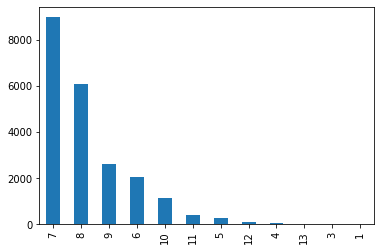

In [ ]:
df["grade"].value_counts().plot.bar()

The three biggest average price increases occur in 9, 12 and 13 grades. 
Considering that the frequency of **9 grades** is much higher than the others, I choose it as the ideal house grade to resell.

### **Bathrooms**


In [ ]:
# Checking minimum and maximum of bathrooms in the df
df.bathrooms.describe()

count    21613.000000
mean         2.114757
std          0.770163
min          0.000000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

In [ ]:
# Checking the mean of price per bathroom
bathrooms_mean_price = []

for n in range(0, 9):
    bathrooms_mean = df.query(f"bathrooms >= {n} & bathrooms < {n + 1}").price.mean()
    bathrooms_mean_price.append(bathrooms_mean)
    print(f"Mean price for {n}-{n + 1} bathrooms: {bathrooms_mean:.2f}")

Mean price for 0-1 bathrooms: 309727.93
Mean price for 1-2 bathrooms: 397462.24
Mean price for 2-3 bathrooms: 544193.29
Mean price for 3-4 bathrooms: 884999.35
Mean price for 4-5 bathrooms: 1398806.68
Mean price for 5-6 bathrooms: 1957492.29
Mean price for 6-7 bathrooms: 2729657.50
Mean price for 7-8 bathrooms: 3667500.00
Mean price for 8-9 bathrooms: 4990000.00


In [ ]:
# Checking the additional value on average per bathroom
local1 = -1
local2 = 0

# The difference starts at the second element of the list
print("percentage increased in mean price: ")

for n in range(0, 8):
  local1 = local1 + 1
  local2 = local2 + 1
  add_percentage = (bathrooms_mean_price[local2] - bathrooms_mean_price[local1]) / (bathrooms_mean_price[local1])
  print(f"{add_percentage}")

percentage increased in mean price: 
0.2832625011301839
0.3691697942909717
0.6262592050968255
0.5805736826250972
0.39940158922048336
0.39446653844848045
0.34357515549111933
0.3605998636673483


In [ ]:
# Checking the mean price increased per bathroom
local1 = -1
local2 = 0

# The difference starts at the second element of the list
print("mean price increases: ")

for n in range(0, 8):
  local1 = local1 + 1
  local2 = local2 + 1
  add_price = (bathrooms_mean_price[local2] - bathrooms_mean_price[local1])
  print(f"${add_price:.2f}")

Mean price increases: 
$87734.31
$146731.05
$340806.06
$513807.33
$558685.61
$772165.21
$937842.50
$1322500.00


In [ ]:
# Checking the frequency of sales per bathroom
for n in range(0, 9):
    bathrooms_mean = df.query(f"bathrooms >= {n} & bathrooms < {n + 1}")
    print(f"Frequency for {n}-{n +1} bathrooms: {bathrooms_mean.size/21}")

Frequency for 0-1 bathrooms: 86.0
Frequency for 1-2 bathrooms: 8355.0
Frequency for 2-3 bathrooms: 10542.0
Frequency for 3-4 bathrooms: 2228.0
Frequency for 4-5 bathrooms: 338.0
Frequency for 5-6 bathrooms: 48.0
Frequency for 6-7 bathrooms: 12.0
Frequency for 7-8 bathrooms: 2.0
Frequency for 8-9 bathrooms: 2.0


Considering the frequency first and the price percentage increased, the ideal number of **bathrooms is 3-4**, it's not so difficulty to sell and the price's percentage increased is bigger than 60% of price increases.

### **View**

In [ ]:
# Checking minimum and maximum of views in the df
df.view.describe()

count    21613.000000
mean         0.234303
std          0.766318
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

In [ ]:
# Checking the mean of price per view
view_mean_price = []

for n in range(0, 5):
    view_mean = df.loc[df.view == n].price.mean()
    view_mean_price.append(view_mean)
    print(f"Price mean for {n} views: {view_mean:.2f}")

Price mean for 0 views: 496556.83
Price mean for 1 views: 812280.84
Price mean for 2 views: 792400.89
Price mean for 3 views: 971965.27
Price mean for 4 views: 1463711.24


In [ ]:
# Checking the additional value on average per view
local1 = -1
local2 = 0

# The difference starts at the second element of the list
print("percentage increased in mean price: ")

for n in range(0, 4):
  local1 = local1 + 1
  local2 = local2 + 1
  add_percentage = (view_mean_price[local2] - view_mean_price[local1]) / (view_mean_price[local1])
  print(f"{add_percentage}")

percentage increased in mean price: 
0.635826526133913
-0.02447423179869886
0.22660800790675295
0.5059295600686093


In [ ]:
# Checking the frequency of sales per view
df.groupby("view").size()

view
0    19488
1      332
2      963
3      510
4      319
dtype: int64

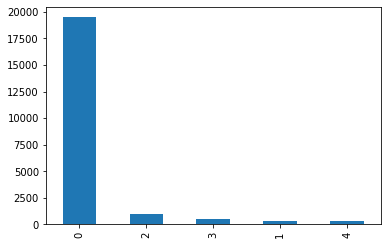

In [ ]:
df["view"].value_counts().plot.bar()

Although 0 views have the best overwhelming frequency, it has a very low average sales price and the highest mean price and percentage increased has a considerable frequency in comparisons the others. So I'm choosing **4 views** as the ideal number for a house to resell.

### **Condition**

In [ ]:
# Checking minimum and maximum of condition in the df
df.condition.describe()

count    21613.000000
mean         3.409430
std          0.650743
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: condition, dtype: float64

In [ ]:
# Checking the mean of price per condition
condition_mean_price = []

for n in range(1, 6):
    condition_mean = df.loc[df.condition == n].price.mean()
    condition_mean_price.append(condition_mean)
    print(f"Price mean for {n} conditions: {condition_mean:.2f}")

Price mean for 1 conditions: 334431.67
Price mean for 2 conditions: 327287.15
Price mean for 3 conditions: 542012.58
Price mean for 4 conditions: 521200.39
Price mean for 5 conditions: 612418.09


In [ ]:
# Checking the additional value on average per condition
local1 = -1
local2 = 0

# The difference starts at the second element of the list
print("percentage increased in mean price: ")

for n in range(0, 4):
  local1 = local1 + 1
  local2 = local2 + 1
  add_percentage = (condition_mean_price[local2] - condition_mean_price[local1]) / (condition_mean_price[local1])
  print(f"{add_percentage}")

percentage increased in mean price: 
-0.021363172300757485
0.6560765855031814
-0.03839797996206541
0.175014641335722


In [ ]:
# Checking the frequency of sales per condition
df.groupby("condition").size()

condition
1       30
2      172
3    14031
4     5679
5     1700
dtype: int64

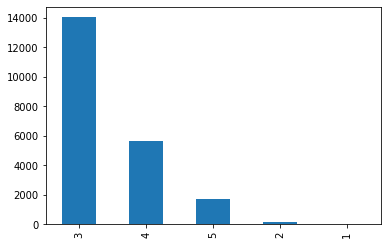

In [ ]:
df["condition"].value_counts().plot.bar()

The number of condition with a great average price and higher frequencies is 3 
and 4. Because of that, I'm choosing **3 or 4** conditions as the ideal for a house to resell.

### **Bedrooms**

In [ ]:
# Checking minimum and maximum of bedrooms in the df
df.bedrooms.describe()

count    21613.000000
mean         3.370842
std          0.930062
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [ ]:
df.groupby("bedrooms").size()

bedrooms
0       13
1      199
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
33       1
dtype: int64

In [ ]:
df.drop(df[df.bedrooms > 15].index, inplace=True)

df.groupby("bedrooms").size()

bedrooms
0       13
1      199
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
dtype: int64

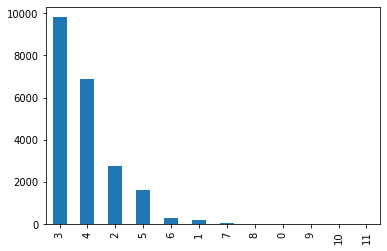

In [ ]:
df["bedrooms"].value_counts().plot.bar()

In [ ]:
# Checking the mean of price per bedroom
bedrooms_mean_price = []

for n in range(0, 12):
    bedrooms_mean = df.loc[df.bedrooms == n].price.mean()
    bedrooms_mean_price.append(bedrooms_mean)
    print(f"Price mean for {n} bedrooms: {bedrooms_mean:.2f}")

Price mean for 0 bedrooms: 409503.85
Price mean for 1 bedrooms: 317642.88
Price mean for 2 bedrooms: 401372.68
Price mean for 3 bedrooms: 466232.08
Price mean for 4 bedrooms: 635419.50
Price mean for 5 bedrooms: 786599.83
Price mean for 6 bedrooms: 825520.64
Price mean for 7 bedrooms: 951184.66
Price mean for 8 bedrooms: 1105076.92
Price mean for 9 bedrooms: 893999.83
Price mean for 10 bedrooms: 819333.33
Price mean for 11 bedrooms: 520000.00


In [ ]:
# Checking the additional value on average per bedroom
local1 = -1
local2 = 0

# The difference starts at the second element of the list
print("percentage increased in mean price: ")

for n in range(0, 11):
  local1 = local1 + 1
  local2 = local2 + 1
  add_percentage = (bedrooms_mean_price[local2] - bedrooms_mean_price[local1]) / (bedrooms_mean_price[local1])
  print(f"{add_percentage}")

percentage increased in mean price: 
-0.2243225859647345
0.2635972709235326
0.16159394877787892
0.36288242174099494
0.23792207138826438
0.049479806306345915
0.15222396192267673
0.16179010448170694
-0.19100669404612736
-0.08351959051446504
-0.3653376729048007


In [ ]:
# Checking the mean price increased per bedroom
local1 = -1
local2 = 0

# The difference starts at the second element of the list
print("Mean price increases: ")

for n in range(0, 11):
  local1 = local1 + 1
  local2 = local2 + 1
  add_price = (bedrooms_mean_price[local2] - bedrooms_mean_price[local1])
  print(f"${add_price:.2f}")

Mean price increases: 
$-91860.96
$83729.80
$64859.40
$169187.43
$151180.32
$38920.81
$125664.02
$153892.27
$-211077.09
$-74666.50
$-299333.33


I'm choosing **4 rooms** as the ideal number of bedrooms. Four bedrooms have the second highest frequency of sales and the largest percentage increase in average price

## **Looking for the perfect fit**

In [ ]:
# Looking for houses with all ideal attributes based on correlation
df.query("sqft_living > 3000 & sqft_living <= 4000 & grade == 9 & bathrooms >= 3 & bathrooms < 4 & view == 4 & condition >= 3 & condition < 5 & bedrooms == 4")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
11599,7284900030,2014-05-22,850000.0,4,3.25,3090,6744,2.0,0,4,3,9,3090,0,1923,2015,98177,47.7680,-122.388,2020,6656
12591,7922900040,2014-05-22,1075000.0,4,3.00,3600,9200,1.0,0,4,4,9,2100,1500,1976,0,98008,47.5866,-122.116,2700,9775
17151,4107100190,2015-03-24,2500000.0,4,3.75,3480,14850,1.0,0,4,3,9,1870,1610,1951,2013,98004,47.6227,-122.216,4780,18480


In [ ]:
# Checking the average price of houses with all the ideal attributes
df.query("sqft_living > 3000 & sqft_living <= 4000 & grade == 9 & bathrooms >= 3 & bathrooms < 4 & view == 4 & condition >= 3 & condition < 5 & bedrooms == 4").price.mean()

1475000.0

In [ ]:
# Creating a new mean between the average neighbordhood price and the attribute of the house with the highest correlation (square feet)
zipcode_mean_98177 = df.loc[df.zipcode == 98177].price.mean()
sqft_mean_3000_4000 = df.query("sqft_living > 3000 & sqft_living <= 4000").price.mean()

buy_value = (zipcode_mean_98177 + sqft_mean_3000_4000) / 2
buy_value

774470.2315286271

Should buy the house with **id number 7284900030** for maximum of **$774,470.00** taking into account the average value of the neighborhood and the attribute with the highest correlation. And sell it for **1,475,000.00** considerating the average price of houses with all the ideal attributes.

## **Looking for low prices with great locations**

### **Checking the best localizations**

In [ ]:
# Checking minimum and maximum of zipcodes in the df
df.zipcode.describe()

count    21613.000000
mean     98077.939805
std         53.505026
min      98001.000000
25%      98033.000000
50%      98065.000000
75%      98118.000000
max      98199.000000
Name: zipcode, dtype: float64

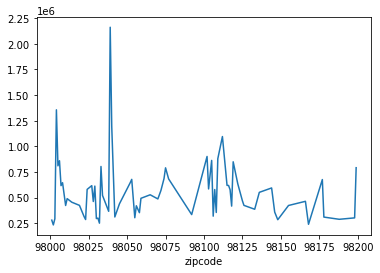

In [ ]:
# Checking the mean of price per zipcode with a grafic
zipcode_mean_price = df.groupby("zipcode")["price"].mean()

zipcode_mean_price.plot()

In [ ]:
# Selecting the top 5 zipcodes price averages
zipcode_mean_price.sort_values(ascending=False)[:5]

zipcode
98039    2.160607e+06
98004    1.355927e+06
98040    1.194230e+06
98112    1.095499e+06
98102    9.012583e+05
Name: price, dtype: float64

In [ ]:
# Creating a list with the previous top 5 zipcodes
zipcode_ideals = [98039, 98004, 98040, 98112, 98102]



In [ ]:
# Finding the frequency of sales for each zipcode in the previous list
zipcode_unique = df.zipcode.unique()

for n in zipcode_unique:
  if n in zipcode_ideals:
    zipcode_counts = df.loc[df.zipcode == n].zipcode.count()
    print(f"frequency of sales in zipcode {n}: {zipcode_counts}")

frequency of sales in zipcode 98040: 282
frequency of sales in zipcode 98112: 269
frequency of sales in zipcode 98004: 317
frequency of sales in zipcode 98102: 105
frequency of sales in zipcode 98039: 50


The ideal zipcode is the **98004**, because it has the second highest average price and the highest frequency of sales on the list. But all locations are great and have an average price higher than the general mean.

### **Finding low prices**

In [ ]:
# Retrieving the list of zip codes and average prices
zipcode_mean_price.sort_values(ascending=False)[:5]

zipcode
98039    2.160607e+06
98004    1.355927e+06
98040    1.194230e+06
98112    1.095499e+06
98102    9.012583e+05
Name: price, dtype: float64

In [ ]:
# Checking houses in zipcode 98004 that have a ideal square feet size
df.query("sqft_living > 3000 & sqft_living <= 4000 & zipcode == 98004")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
69,1802000060,2014-06-12,1325000.0,5,2.25,3200,20158,1.0,0,0,3,8,1600,1600,1965,0,98004,47.6303,-122.215,3390,20158
393,1653500070,2014-05-12,927000.0,4,2.75,3300,12090,2.0,0,0,3,8,3300,0,1953,0,98004,47.6294,-122.218,3180,12239
885,3323500030,2014-06-04,1270000.0,5,2.50,3200,17204,1.0,0,0,3,7,2160,1040,1952,0,98004,47.6209,-122.222,4090,15732
1282,8964800445,2015-02-09,2260000.0,3,3.50,3110,14872,1.0,0,0,3,10,3110,0,2003,0,98004,47.6178,-122.209,3110,12433
1818,9290900160,2014-09-11,1430000.0,4,2.50,3380,27589,2.0,0,0,3,10,3380,0,1966,0,98004,47.6292,-122.225,3390,20075
2449,4389200796,2014-05-22,1600000.0,3,2.50,3160,12824,1.0,0,2,4,9,1820,1340,1966,0,98004,47.6151,-122.216,3390,11985
2717,9808590310,2015-04-08,1000750.0,3,2.75,3070,10739,2.0,0,0,3,10,2440,630,1987,0,98004,47.6444,-122.191,3490,11913
3256,540100057,2015-04-28,1208000.0,4,3.75,3250,10949,2.0,0,0,4,9,2940,310,1930,1989,98004,47.6390,-122.219,2340,15234
3281,8964800025,2015-02-26,1965000.0,5,3.75,3940,13738,1.5,0,3,4,9,3940,0,1951,0,98004,47.6203,-122.212,2370,13320
3526,6448000090,2014-05-12,1575000.0,5,2.75,3650,20150,1.0,0,0,4,10,2360,1290,1975,0,98004,47.6215,-122.224,3220,19800


In [ ]:
# Checking the average price of houses in zipcode 98004 that have a ideal square feet size
house_mean = df.query("sqft_living > 3000 & sqft_living <= 4000 & zipcode == 98004").price.mean()
house_mean

1532950.1694915255

In [ ]:
# Creating a lower search price to find the chapest houses
house_mean * 0.6

919770.1016949153

In [ ]:
# Reducing options when looking for cheaper houses than average.
df.query("sqft_living > 3000 & sqft_living <= 4000 & zipcode == 98004 & price < 919770.10")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13357,9808590210,2014-05-13,860000.0,4,2.5,3560,11119,1.0,0,2,3,10,2290,1270,1986,0,98004,47.6456,-122.190,3290,11385
15353,644210020,2015-01-05,780000.0,4,2.5,3020,15164,1.0,0,0,4,8,1730,1290,1976,0,98004,47.5882,-122.192,2600,11556


Should buy the house with **id number 9808590210 and 644210020** for maximum of **$919,770.00** taking into account the average value of the neighborhood and the attribute with the highest correlation. And sell it for **1,532,950.00** considerating the average price of houses with those attributes.

## **Challenge answer**

Which houses should de CEO of House Rocket buy and a what purchase price? 
**The homes that the CEO must buy are divided into two groups, the first one consists of a house with all the ideal attributes and that is priced well below the average for that profile (id number: 7284900030), so the recommended purchase price is around   $774,470.00 to sell after for 1,475,000 dollars. The second one consists of two houses with a great location and a much lower price than the average for that location with an ideal square feet (id number 9808590210 / 644210020) and the recommended purchase price is around 919,770.00 to sell after for 1,532,950**

---
Once the house is owned by the company, what's the best moment to sell it and what would be the sale price? **The best moment to sell the house is from April to June, more precisely in April, since these months have the highest average price and also a good frequency of sales**

---
The House Rocket should do some renovation to increase the sale price? What would be the suggestions for changes? What is the increase in the price given for each renovation option? **Yes, the house rocket should do some renovation to the houses of the second group, increase the number of bathroom to 3 will allow to increase the price of the houses in approximately 340 thousand dollars without needing to sacrifice much of the frequency of sales.**

 ---
What's the ideal house's profile based on average price and frequency? 
**The ideal house's profile is one that has a combination of attributes that increase the value of the house and that are sold with good frequency. So the ideal home should have between 3000 to 4000ft², 9 grades, 3 to 3.75 bathrooms, 4 views, 3 or 4 conditions and 4 bedrooms. It is not surprising that the average price of houses with these attributes is 1.475 million dollars, well above the general average.**





